In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# SC2001 Project 1

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer **S** as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to **S**, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

## (a) Algorithm implementation

### i. Insertion Sort

In [1]:
iarr = [0] * 10000001

def insertion_sort(l, r):
    count = 0
    for i in range(l, r + 1):
        for j in range(i, l, -1):
            if iarr[j] < iarr[j - 1]:
                tmp = iarr[j]
                iarr[j] = iarr[j - 1]
                iarr[j - 1] = tmp
                count += 1
            else: break
    return count

- store the array numbers into **iarr**, then use **insertion_sort(0, len - 1)** to sort the array and calculate the count.

### ii. Merge Sort

In [2]:
marr = [0] * 10000001
mtmp = [0] * 10000001

def merge_sort(l, r):
    if(l == r): return 0
    mid = l + (r-l)//2
    count = 0
    count += merge_sort(l, mid)
    count += merge_sort(mid + 1, r)
    pl = l
    pr = mid + 1
    p = l
    while (pl <= mid) or (pr <= r):
        count += 1
        if (pr == r + 1) or ((pl != mid + 1) and (marr[pl] < marr[pr])):
            mtmp[p] = marr[pl]
            pl += 1
        else:
            mtmp[p] = marr[pr]
            pr += 1
        p += 1
        
    for i in range(l, r + 1):
        marr[i] = mtmp[i];
    return count

- store the array numbers into **marr**, then use **merge_sort(0, len - 1)** to sort the array and calculate the count.

### iii. Hybrid Sort

In [3]:
harr = [0] * 10000001
htmp = [0] * 10000001

def hybrid_sort(l, r, threshold):
    if(r - l + 1 <= threshold):
        count = 0
        for i in range(l, r + 1):
            for j in range(i, l, -1):
                if harr[j] < harr[j - 1]:
                    tmp = harr[j]
                    harr[j] = harr[j - 1]
                    harr[j - 1] = tmp
                    count += 1
                else: break
        return count
    else:
        mid = (l + r) // 2
        count = 0
        count += hybrid_sort(l, mid, threshold)
        count += hybrid_sort(mid + 1, r, threshold)
        pl = l
        pr = mid + 1
        p = l
        while (pl <= mid) or (pr <= r):
            count += 1
            if (pr == r + 1) or ((pl != mid + 1) and (harr[pl] < harr[pr])):
                htmp[p] = harr[pl]
                pl += 1
            else:
                htmp[p] = harr[pr]
                pr += 1
            p += 1

        for i in range(l, r + 1):
            harr[i] = htmp[i];
        return count

- store the array numbers into **harr**, then use **hybrid_sort(0, len - 1, threshold)** to sort the array and calculate the count.

## (b) Generate input data

In [ ]:
import random
def generate_data():
    m = 1000
    while m <= 1000000:
        for n in range(m, m * 10, m):
            arr = []
            for i in range(1, n + 1):
                arr.append(i)
            random.shuffle(arr)
            textfile = open("data/data_" + str(n) + ".txt", "w")
            textfile.write(str(arr))
            textfile.close()
        m *= 10;
    arr = []
    for i in range(1, m + 1):
        arr.append(i)
    random.shuffle(arr)
    textfile = open("data/data_" + str(m) + ".txt", "w")
    textfile.write(str(arr))
    textfile.close()

generate_data()

- The code is to generate the data: <br>
n = 1000, 2000, ... , 8000, 9000 <br>
n = 10000, 20000, ... , 80000, 90000 <br>
... <br>
n = 1000000, 2000000, ... , 8000000, 9000000, 10000000 <br>
- The form of datasets is **data_\<size\>.txt**

In [4]:
sample_size = 1000
file = open("data/data_" + str(sample_size) + ".txt", "r")
arr = (file.read())[1:-1].split(', ')
arr = [int(i) for i in arr]
# print(arr)

- The way of reading the data list from file.

## (c) Analyze time complexity

Let's assume the **threshold** = $S$

- For **insertion sort** :

Each subarray with the length of $S$, the best case of count $O(S)$ and the worst case $O(S^2)$

As there's $\frac{n}{S}$ blocks, the best case of total cost $O(S\times\frac{n}{S})=O(n)$ and the worst case $O(S^2\times\frac{n}{S})=O(Sn)$

- For **merge sort** :

Since the length of threshold is $S$, there's would be $\log(\frac{n}{S})$ interations of merge sort

For each iteration, the cost of merging is $O(n)$, thus total cost of merge sort part is $O(n\times\log(\frac{n}{S}))$

- For **hybrid sort** :

The best case : $O(n + n\times \log(\frac{n}{S}))$

The worst case : $O(Sn + n\times\log(\frac{n}{S}))$

In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

- here we fix S (threshold) at 15, and consider the dataset_size at 1000, 10000, ... , 10000000

   dataset_size  best_case  real_case  worst_case
0          1000       7058       9041       21058
1         10000     103808     121572      243808
2        100000    1370274    1579631     2770274
3       1000000   17024677   19295669    31024677
4      10000000  203466060  221405031   343466060


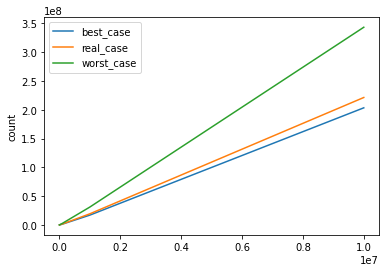

In [6]:
datasets = [1000, 10000, 100000, 1000000, 10000000]

best_case = []
real_case = []
worst_case = []

for size in datasets:
    file = open("data/data_" + str(size) + ".txt", "r")
    arr = (file.read())[1:-1].split(', ')
    arr = [int(i) for i in arr]
    harr = arr
    best_case.append(int(size + size * math.log2(size / 15)))
    real_case.append(hybrid_sort(0, size - 1, 15))
    worst_case.append(int(size * 15 + size * math.log2(size / 15)))

df = pd.DataFrame({'dataset_size': datasets, 'best_case': best_case, 'real_case': real_case, 'worst_case': worst_case})
print(df)
plt.plot(datasets, best_case, label="best_case")
plt.plot(datasets, real_case, label="real_case")
plt.plot(datasets, worst_case, label="worst_case")
plt.ylabel('count')
plt.legend()
plt.show()

### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

- here we fix the dataset size at 10_000_000, and consider the threshold at [1, 30]

    threshold  best_case  real_case  worst_case
0           1  242534966  233222784   242534966
1           2  232534966  226930625   242534966
2           3  226685341  223708672   246685341
3           4  222534966  222735783   252534966
4           5  219315685  219513361   259315685
5           6  216685341  219513361   266685341
6           7  214461417  219513361   274461417
7           8  212534966  219513361   282534966
8           9  210835716  219996164   290835716
9          10  209315685  221405031   299315685
10         11  207940650  221405031   307940650
11         12  206685341  221405031   316685341
12         13  205530569  221405031   325530569
13         14  204461417  221405031   334461417
14         15  203466060  221405031   343466060
15         16  202534966  221405031   352534966
16         17  201660338  221405031   361660338
17         18  200835716  221405031   370835716
18         19  200055691  234020557   380055691
19         20  199315685  235172174   38

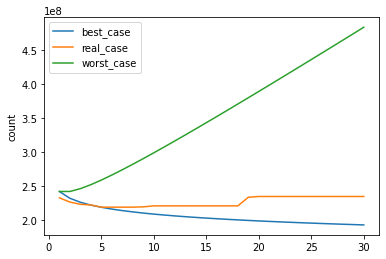

In [7]:
def getCountsPerThreshold(size: int, printDataFrame: bool) -> list[int]:
    best_case = []
    real_case = []
    worst_case = []
    file = open("data/data_" + str(size) + ".txt", "r")
    arr = (file.read())[1:-1].split(', ')
    arr = [int(i) for i in arr]
    for threshold in range(1, 31):
        global harr
        harr = [i for i in arr]
        best_case.append(int(size + size * math.log2(size / threshold)))
        real_case.append(hybrid_sort(0, size - 1, threshold))
        worst_case.append(int(size * threshold + size * math.log2(size / threshold)))

    df = pd.DataFrame({'threshold': range(1, 31), 'best_case': best_case, 'real_case': real_case, 'worst_case': worst_case})
    if printDataFrame:
        print(df)
    plt.plot(range(1, 31), best_case, label="best_case")
    plt.plot(range(1, 31), real_case, label="real_case")
    plt.plot(range(1, 31), worst_case, label="worst_case")
    plt.ylabel('count')
    plt.legend()
    plt.show()
    return real_case

countsPerThreshold_10m = getCountsPerThreshold(10_000_000, True)

- You may find that when threshold is very small, the real_case of key comparison may be lower than best_case of expectation. That's because when the data is randomly generated, the real case may be less than expected case.

### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

- Plot values of s(threshold) against count(number of comparisons) for size of N in [1000, 10_000, 100_000, 1_000_000, 10_000_000].

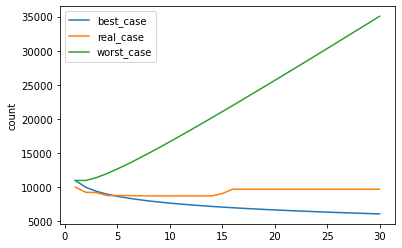

For input size 1000, threshold which yields the minimum number of comparisons is [8, 14]


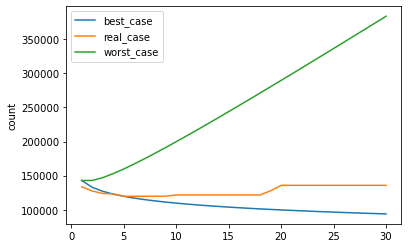

For input size 10000, threshold which yields the minimum number of comparisons is [5, 8]


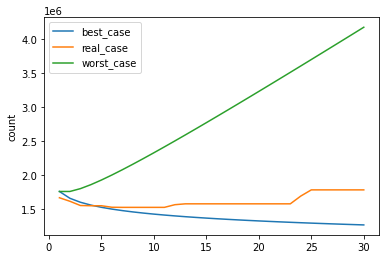

For input size 100000, threshold which yields the minimum number of comparisons is [7, 11]


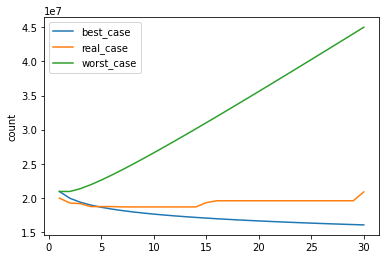

For input size 1000000, threshold which yields the minimum number of comparisons is [8, 14]


,1000,10000000,10000,100000,1000000
1,9976,233222784,133616,1668928,19951424
2,9229,226930625,127457,1617136,19238250
3,9188,223708672,123813,1554921,19140972
4,8754,222735783,123350,1551526,18714142
5,8754,219513361,119718,1551526,18714142
6,8754,219513361,119718,1529474,18714142
7,8712,219513361,119718,1527731,18665227
8,8701,219513361,119718,1527731,18663969
9,8701,219996164,119918,1527731,18663969
10,8701,221405031,121572,1527731,18663969


In [8]:
# omit input size of 10million as it is already calculated above
inputSizes = [1000, 10_000, 100_000, 1_000_000]
result_dict = {}

def getMinThresholdRange(counts: list[int]) -> (int,int):
    minThreshold, maxThreshold = 0, 0
    minCount = float('infinity')
    
    for index, count in enumerate(counts):
        if count < minCount:
            minCount, minThreshold = count, index + 1
        if count == minCount:
            maxThreshold = index + 1
            
    return (minThreshold, maxThreshold)
            

for size in inputSizes:
    counts = getCountsPerThreshold(size, False)
    minThreshold, maxThreshold = getMinThresholdRange(counts)
    result_dict[size] = counts
    print(f"For input size {size}, threshold which yields the minimum number of comparisons is [{minThreshold}, {maxThreshold}]")
    
    result_dict[10_000_000] = countsPerThreshold_10m
    
def highlight_min(s, props=''):
    return np.where(s == np.amin(s.values), props, '')

result_df = pd.DataFrame(result_dict)
result_df.index = np.arange(1, len(result_df)+1)
presentable_result = result_df.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)
presentable_result

## (d) Compare with original Mergesort

  sort_functions key_comparasions           time_cost
0    hybrid_sort        219513361   107.1745278340004
1     merge_sort        233222784  109.33150066599956


<AxesSubplot:xlabel='sort_functions'>

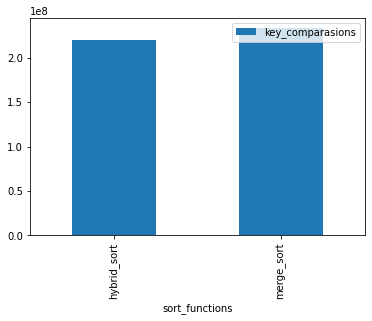

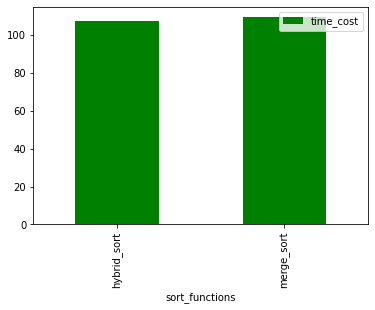

In [11]:
import timeit
threshold = getMinThresholdRange(countsPerThreshold_10m)[0]
size = 10_000_000

file = open("data/data_" + str(size) + ".txt", "r")
arr = (file.read())[1:-1].split(', ')

harr = [int(i) for i in arr]
time_start_hybrid = timeit.default_timer()
count_hybrid = hybrid_sort(0, size - 1, threshold)
time_end_hybrid = timeit.default_timer()

marr = [int(i) for i in arr]
time_start_merge = timeit.default_timer()
count_merge = merge_sort(0, size - 1)
time_end_merge = timeit.default_timer()

frame = pd.DataFrame(np.array([['hybrid_sort', count_hybrid, time_end_hybrid - time_start_hybrid], 
                               ['merge_sort', count_merge, time_end_merge - time_start_merge]]),
                   columns=['sort_functions', 'key_comparasions', 'time_cost'])
print(frame)
frame[['key_comparasions','time_cost']] = frame[['key_comparasions',"time_cost"]].apply(pd.to_numeric)

frame[['key_comparasions','sort_functions']].plot(kind='bar',y='key_comparasions',x='sort_functions')
frame[['time_cost','sort_functions']].plot(kind='bar',y='time_cost',x='sort_functions',color="green")